In [47]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

In [49]:
print(os.getcwd())

/Users/santiagoaristizabal/Desktop/HackatonAi2026


In [50]:
path_consumos = "dataset/consumos_uptc.csv"
path_sedes = "dataset/sedes_uptc.csv"

df_consumos = pd.read_csv(path_consumos)
df_consumos


,reading_id,timestamp,sede,sede_id,energia_total_kwh,energia_comedor_kwh,energia_salones_kwh,energia_laboratorios_kwh,energia_auditorios_kwh,energia_oficinas_kwh,...,dia_nombre,mes,trimestre,año,periodo_academico,es_fin_semana,es_festivo,es_semana_parciales,es_semana_finales,co2_kg
0,1,2018-01-01 00:00:00,Chiquinquirá,UPTC_CHI,0.928,0.0452,0.1497,0.4334,0.0386,0.2613,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.1877
1,2,2018-01-01 00:00:00,Duitama,UPTC_DUI,2.592,0.1129,0.2007,1.7993,0.0573,0.4217,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.4490
2,3,2018-01-01 00:00:00,Sogamoso,UPTC_SOG,2.841,0.1395,0.2388,1.9638,NaN,0.4443,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.6048
3,4,2018-01-01 00:00:00,Tunja,UPTC_TUN,1.505,0.0892,0.1091,0.9672,0.0364,0.3031,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.2872
4,5,2018-01-01 01:00:00,Chiquinquirá,UPTC_CHI,0.917,0.0479,0.1432,0.4071,0.0418,0.2766,...,Lunes,1,1,2018,vacaciones_fin,False,True,False,False,0.1599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275382,275383,2025-10-30 23:00:00,Tunja,UPTC_TUN,2.253,0.2312,0.1803,1.3621,0.0506,0.4286,...,Jueves,10,4,2025,semestre_2,False,False,False,False,0.5161
275383,275384,2025-10-31 00:00:00,Chiquinquirá,UPTC_CHI,1.273,0.1362,0.1948,0.5314,0.0551,0.3556,...,Viernes,10,4,2025,semestre_2,False,False,False,False,0.2223
275384,275385,2025-10-31 00:00:00,Duitama,UPTC_DUI,4.159,0.3442,0.3703,2.6320,0.0769,0.7352,...,Viernes,10,4,2025,semestre_2,False,False,False,False,0.7608
275385,275386,2025-10-31 00:00:00,Sogamoso,UPTC_SOG,5.063,0.3924,0.3327,3.5558,0.0821,0.6998,...,Viernes,10,4,2025,semestre_2,False,False,False,False,0.8754


In [51]:
df_sedes = pd.read_csv(path_sedes)
df_sedes

,sede,sede_id,nombre_completo,ciudad,area_m2,num_estudiantes,num_empleados,num_edificios,tiene_residencias,tiene_laboratorios_pesados,altitud_msnm,temp_promedio_c,pct_comedores,pct_salones,pct_laboratorios,pct_auditorios,pct_oficinas
0,Tunja,UPTC_TUN,Sede Central Tunja,Tunja,85000,18000,1200,25,True,True,2820,13,0.12,0.25,0.30,0.08,0.25
1,Duitama,UPTC_DUI,Sede Duitama,Duitama,35000,5500,350,12,False,True,2530,15,0.10,0.28,0.32,0.07,0.23
2,Sogamoso,UPTC_SOG,Sede Sogamoso,Sogamoso,40000,6000,400,14,False,True,2570,14,0.10,0.26,0.35,0.06,0.23
3,Chiquinquirá,UPTC_CHI,Sede Chiquinquirá,Chiquinquirá,15000,2000,150,5,False,False,2580,14,0.08,0.35,0.20,0.10,0.27


In [52]:
missing_info_sedes = df_sedes.isnull().sum()
print("Columnas con datos faltantes:")
print(missing_info_sedes[missing_info_sedes > 0])

Columnas con datos faltantes:
Series([], dtype: int64)


In [53]:
missing_info_consumos = df_consumos.isnull().sum()
print("Columnas con datos faltantes:")
print(missing_info_consumos[missing_info_consumos > 0])

Columnas con datos faltantes:
energia_comedor_kwh        8254
energia_auditorios_kwh    13618
agua_litros               10982
temperatura_exterior_c    16385
ocupacion_pct             32766
co2_kg                    13796
dtype: int64


In [57]:
mismatched = df_full[df_full['nombre_completo'].isnull()]

print("IDs de sede que no cruzaron correctamente:")
print(mismatched['sede_id'].unique())

print("\nNombres de sede que no cruzaron correctamente:")
print(mismatched['sede'].unique())

print("\nIDs que existen en df_sedes:")
print(df_sedes['sede_id'].unique())

IDs de sede que no cruzaron correctamente:
<StringArray>
[]
Length: 0, dtype: str

Nombres de sede que no cruzaron correctamente:
<StringArray>
[]
Length: 0, dtype: str

IDs que existen en df_sedes:
<StringArray>
['UPTC_TUN', 'UPTC_DUI', 'UPTC_SOG', 'UPTC_CHI']
Length: 4, dtype: str


In [58]:
def normalizar_id(text):
    if pd.isna(text): return text
    return str(text).upper().replace('-', '_').strip()

df_consumos['sede_id'] = df_consumos['sede_id'].apply(normalizar_id)
df_sedes['sede_id'] = df_sedes['sede_id'].apply(normalizar_id)


df_full = df_consumos.merge(df_sedes, on='sede_id', how='left', suffixes=('', '_drop'))


def clean_periodo(text):
    text = str(text).lower().strip()
    if 'semestre_1' in text or 'semestre1' in text: return 'semestre_1'
    if 'semestre_2' in text: return 'semestre_2'
    if 'vacaciones' in text: return 'vacaciones'
    return text

df_full['periodo_academico'] = df_full['periodo_academico'].apply(clean_periodo)


print(f"Registros sin match de sede: {df_full['nombre_completo'].isnull().sum()}")
print("\nCategorías de periodo académico unificadas:")
print(df_full['periodo_academico'].value_counts())

Registros sin match de sede: 0

Categorías de periodo académico unificadas:
periodo_academico
semestre_1    117460
semestre_2     79522
vacaciones     78405
Name: count, dtype: int64


In [59]:
# Ver missing values reales
missing_info = df_full.isnull().sum()
print("Columnas con datos faltantes:")
print(missing_info[missing_info > 0])

# Ver inconsistencias en periodo_academico (mencionado en el codebook)
print("\nValores únicos en periodo académico:")
print(df_full['periodo_academico'].unique())

Columnas con datos faltantes:
energia_comedor_kwh        8254
energia_auditorios_kwh    13618
agua_litros               10982
temperatura_exterior_c    16385
ocupacion_pct             32766
co2_kg                    13796
dtype: int64

Valores únicos en periodo académico:
<StringArray>
['vacaciones', 'semestre_1', 'semestre_2']
Length: 3, dtype: str


In [65]:
cols_con_nulos = [
    'energia_comedor_kwh', 'energia_auditorios_kwh', 'agua_litros', 
    'temperatura_exterior_c', 'ocupacion_pct', 'co2_kg'
]

# Paso 1: Imputación por Sede + Hora + Día de la semana
# Esto asegura que si falta un martes a las 10am en Tunja, 
# se use el promedio de otros martes a las 10am en Tunja.
for col in cols_con_nulos:
    df_full[col] = df_full[col].fillna(
        df_full.groupby(['sede_id', 'hora', 'dia_semana'])[col].transform('mean')
    )

# Paso 2: Limpieza de remanentes (Fallback)
# Si alguna combinación no tiene datos, 
# usamos una media por hora general de esa sede.
for col in cols_con_nulos:
    df_full[col] = df_full[col].fillna(
        df_full.groupby(['sede_id', 'hora'])[col].transform('mean')
    )

# Paso 3: Interpolación final para casos extremos
# Esto rellena cualquier nulo que haya quedado usando los valores vecinos en el tiempo
df_full = df_full.sort_values(['sede_id', 'timestamp'])
df_full[cols_con_nulos] = df_full[cols_con_nulos].interpolate(method='linear').ffill().bfill()

print("Verificación de nulos post-imputación:")
print(df_full[cols_con_nulos].isnull().sum())

Verificación de nulos post-imputación:
energia_comedor_kwh       0
energia_auditorios_kwh    0
agua_litros               0
temperatura_exterior_c    0
ocupacion_pct             0
co2_kg                    0
dtype: int64


In [66]:
df_full.columns

Index(['reading_id', 'timestamp', 'sede', 'sede_id', 'energia_total_kwh',
       'energia_comedor_kwh', 'energia_salones_kwh',
       'energia_laboratorios_kwh', 'energia_auditorios_kwh',
       'energia_oficinas_kwh', 'potencia_total_kw', 'agua_litros',
       'temperatura_exterior_c', 'ocupacion_pct', 'hora', 'dia_semana',
       'dia_nombre', 'mes', 'trimestre', 'año', 'periodo_academico',
       'es_fin_semana', 'es_festivo', 'es_semana_parciales',
       'es_semana_finales', 'co2_kg', 'sede_drop', 'nombre_completo', 'ciudad',
       'area_m2', 'num_estudiantes', 'num_empleados', 'num_edificios',
       'tiene_residencias', 'tiene_laboratorios_pesados', 'altitud_msnm',
       'temp_promedio_c', 'pct_comedores', 'pct_salones', 'pct_laboratorios',
       'pct_auditorios', 'pct_oficinas'],
      dtype='str')

In [124]:
# =====================================================
# 1. ORDENAMIENTO Y FEATURE ENGINEERING (Lags, Rolls, Ciclos)
# =====================================================
# Asegurar orden para cálculos temporales
df_full = df_full.sort_values(['sede_id', 'timestamp'])

# Generación de Lags y Diferencias por sede
for col in ['energia_total_kwh', 'ocupacion_pct']:
    df_full[f'{col}_lag_1h'] = df_full.groupby('sede_id')[col].shift(1)
    df_full[f'{col}_lag_24h'] = df_full.groupby('sede_id')[col].shift(24)
    df_full[f'{col}_lag_168h'] = df_full.groupby('sede_id')[col].shift(168)

df_full['energia_diff_1h'] = df_full.groupby('sede_id')['energia_total_kwh'].diff(1)

# Suavizados (Rolling)
df_full['energia_rolling_3h'] = df_full.groupby('sede_id')['energia_total_kwh'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
df_full['energia_rolling_24h'] = df_full.groupby('sede_id')['energia_total_kwh'].transform(
    lambda x: x.rolling(window=24, min_periods=1).mean()
)

# Variables Cíclicas para capturar estacionalidad horaria/diaria
df_full['hora_sin'] = np.sin(2 * np.pi * df_full['hora'] / 24)
df_full['hora_cos'] = np.cos(2 * np.pi * df_full['hora'] / 24)
df_full['dow_sin'] = np.sin(2 * np.pi * df_full['dia_semana'] / 7)
df_full['dow_cos'] = np.cos(2 * np.pi * df_full['dia_semana'] / 7)
df_full['mes_sin'] = np.sin(2 * np.pi * df_full['mes'] / 12)
df_full['mes_cos'] = np.cos(2 * np.pi * df_full['mes'] / 12)

# One-Hot Encoding de sedes
sede_dummies = pd.get_dummies(df_full['sede_id'], prefix='sede')
df_final = pd.concat([df_full, sede_dummies], axis=1)

# Limpieza de nulos generados por los Lags
lag_features_check = ['energia_total_kwh_lag_24h', 'ocupacion_pct_lag_1h']
df_final = df_final.dropna(subset=lag_features_check)

# =====================================================
# 2. SELECCIÓN DE FEATURES Y TARGETS
# =====================================================
features = [
    'hora_sin', 'hora_cos', 'dow_sin', 'dow_cos', 'mes_sin', 'mes_cos',
    'temperatura_exterior_c', 'area_m2', 'num_estudiantes', 
    'pct_laboratorios', 'pct_comedores', 'ocupacion_pct_lag_1h', 
    'energia_total_kwh_lag_1h', 'energia_total_kwh_lag_24h', 
    'energia_total_kwh_lag_168h', 'energia_diff_1h', 
    'energia_rolling_3h', 'energia_rolling_24h'
] + list(sede_dummies.columns)

target_cols = ['energia_total_kwh', 'agua_litros', 'co2_kg']

# =====================================================
# 3. SPLIT ESTRATIFICADO POR SEDE (EVITA SESGO HACIA TUNJA)
# =====================================================
X_train_list, X_test_list = [], []
y_train_list, y_test_list = [], []

for sede in df_final['sede_id'].unique():
    df_sede = df_final[df_final['sede_id'] == sede]
    split_idx = int(len(df_sede) * 0.8) # 80% para entrenar, 20% para probar
    
    X_train_list.append(df_sede[features].iloc[:split_idx])
    X_test_list.append(df_sede[features].iloc[split_idx:])
    y_train_list.append(df_sede[target_cols].iloc[:split_idx])
    y_test_list.append(df_sede[target_cols].iloc[split_idx:])

X_train, X_test = pd.concat(X_train_list), pd.concat(X_test_list)
y_train, y_test = pd.concat(y_train_list), pd.concat(y_test_list)

# =====================================================
# 4. MODELADO Y ENTRENAMIENTO
# =====================================================
xgb_base = XGBRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    tree_method='hist'
)

multi_model = MultiOutputRegressor(xgb_base)

print(f"🚀 Iniciando entrenamiento balanceado ({X_train.shape[0]} registros)...")
multi_model.fit(X_train, y_train)
print("✅ Entrenamiento completado exitosamente.\n")

# =====================================================
# 5. EVALUACIÓN DE MÉTRICAS FINALES
# =====================================================
preds = multi_model.predict(X_test)
targets_names = ['Energía (kWh)', 'Agua (L)', 'CO₂ (kg)']

print("📈 INFORME DE RENDIMIENTO MULTI-TARGET:")
print("-" * 45)
for i, name in enumerate(targets_names):
    r2 = r2_score(y_test.iloc[:, i], preds[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], preds[:, i])
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], preds[:, i]))
    
    print(f"Variable: {name}")
    print(f"   R² (Precisión): {r2:.4f}")
    print(f"   Error Medio (MAE): {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}\n")

🚀 Iniciando entrenamiento balanceado (220154 registros)...
✅ Entrenamiento completado exitosamente.

📈 INFORME DE RENDIMIENTO MULTI-TARGET:
---------------------------------------------
Variable: Energía (kWh)
   R² (Precisión): 0.9906
   Error Medio (MAE): 0.13
   RMSE: 0.67

Variable: Agua (L)
   R² (Precisión): 0.7561
   Error Medio (MAE): 131.96
   RMSE: 789.00

Variable: CO₂ (kg)
   R² (Precisión): 0.9384
   Error Medio (MAE): 0.13
   RMSE: 0.34



In [125]:
# 1. Preparar el contenedor
anomalias_por_sede = []

# 2. Iterar por cada sede para calcular umbrales PROPIOS
for sede in df_final['sede_id'].unique():
    # Extraemos los resultados del test que pertenecen a esta sede
    mask_sede = (df_final.loc[X_test.index, 'sede_id'] == sede)
    df_sede_test = df_test_results[mask_sede].copy()
    
    if len(df_sede_test) > 0:
        # Calculamos el umbral local (específico para esta sede)
        # Bajamos a 2 desviaciones estándar para ser más sensibles en sedes pequeñas
        mean_s = df_sede_test['energia_error'].mean()
        std_s = df_sede_test['energia_error'].std()
        umbral_local = mean_s + 2 * std_s
        
        # Filtramos anomalías
        sede_anom = df_sede_test[df_sede_test['energia_error'] > umbral_local].copy()
        
        # GARANTÍA: Si detecta menos de 5, forzamos las 5 con mayor error
        if len(sede_anom) < 5:
            sede_anom = df_sede_test.sort_values('energia_error', ascending=False).head(5).copy()
            
        anomalias_por_sede.append(sede_anom)

# 3. Consolidar el nuevo DataFrame de anomalías
df_anomalias_equitativo = pd.concat(anomalias_por_sede)

# 4. Rescatar la información completa (Sede, Ciudad, Sectores)
anomalias_final = df_final.loc[df_anomalias_equitativo.index].copy()
anomalias_final['energia_real'] = df_anomalias_equitativo['energia_real']
anomalias_final['energia_pred'] = df_anomalias_equitativo['energia_pred']
anomalias_final['energia_error'] = df_anomalias_equitativo['energia_error']

# 5. Identificar el Sector Responsable (Usando los contadores reales)
sectores_cols = ['energia_comedor_kwh', 'energia_salones_kwh', 'energia_laboratorios_kwh', 
                 'energia_auditorios_kwh', 'energia_oficinas_kwh']

anomalias_final['sector_critico'] = anomalias_final[sectores_cols].idxmax(axis=1).str.replace('energia_', '').str.replace('_kwh', '').str.capitalize()

# 6. RESULTADO FINAL
resumen_final = anomalias_final.groupby(['sede_id', 'sector_critico']).size().unstack(fill_value=0)
print("✅ ¡Logrado! Distribución de anomalías por todas las sedes:")
display(resumen_final)

✅ ¡Logrado! Distribución de anomalías por todas las sedes:


sector_critico,Laboratorios,Oficinas,Salones
sede_id,,,
UPTC_CHI,6,13,31
UPTC_DUI,72,1,2
UPTC_SOG,111,2,0
UPTC_TUN,155,15,2


In [130]:
# 1. Categorización (Aseguramos que las columnas existan)
def categorizar_horario(h):
    if 6 <= h < 12: return 'Mañana (Clases)'
    if 12 <= h < 18: return 'Tarde (Labs/Comedor)'
    if 18 <= h < 22: return 'Noche (Nocturna)'
    return 'Madrugada (Fantasma)'

anomalias_final['franja_horaria'] = anomalias_final['hora'].apply(categorizar_horario)
anomalias_final['condicion_uso'] = np.where(anomalias_final['ocupacion_pct'] < 10, 'Sede Vacía', 'Sede en Uso')

# 2. Resumen Multidimensional
resumen_hackathon = anomalias_final.groupby(
    ['sede_id', 'sector_critico', 'franja_horaria', 'condicion_uso']
).size().reset_index(name='frecuencia')

# 3. FILTRADO INTELIGENTE: Seleccionar los 3 problemas más frecuentes POR SEDE
# Esto garantiza que verás todas las sedes en la tabla
resumen_por_sede = resumen_hackathon.sort_values(
    ['sede_id', 'frecuencia'], ascending=[True, False]
).groupby('sede_id').head(3)

print("📊 TOP 3 FOCOS DE INEFICIENCIA POR CADA SEDE:")
display(resumen_por_sede)

# 4. OPCIONAL: Para tu pitch, resalta el 'Consumo Fantasma'
print("\n⚠️ ALERTAS DE CONSUMO FANTASMA (Sede Vacía):")
fantasma = resumen_hackathon[resumen_hackathon['condicion_uso'] == 'Sede Vacía'].sort_values('frecuencia', ascending=False)
display(fantasma)

📊 TOP 3 FOCOS DE INEFICIENCIA POR CADA SEDE:


,sede_id,sector_critico,franja_horaria,condicion_uso,frecuencia
10,UPTC_CHI,Salones,Tarde (Labs/Comedor),Sede en Uso,14
8,UPTC_CHI,Salones,Mañana (Clases),Sede en Uso,12
7,UPTC_CHI,Oficinas,Tarde (Labs/Comedor),Sede en Uso,9
15,UPTC_DUI,Laboratorios,Tarde (Labs/Comedor),Sede en Uso,36
12,UPTC_DUI,Laboratorios,Mañana (Clases),Sede en Uso,18
13,UPTC_DUI,Laboratorios,Noche (Nocturna),Sede en Uso,15
25,UPTC_SOG,Laboratorios,Tarde (Labs/Comedor),Sede en Uso,44
21,UPTC_SOG,Laboratorios,Mañana (Clases),Sede en Uso,29
23,UPTC_SOG,Laboratorios,Noche (Nocturna),Sede en Uso,19
31,UPTC_TUN,Laboratorios,Mañana (Clases),Sede en Uso,54



⚠️ ALERTAS DE CONSUMO FANTASMA (Sede Vacía):


,sede_id,sector_critico,franja_horaria,condicion_uso,frecuencia
24,UPTC_SOG,Laboratorios,Tarde (Labs/Comedor),Sede Vacía,10
36,UPTC_TUN,Oficinas,Mañana (Clases),Sede Vacía,5
34,UPTC_TUN,Laboratorios,Tarde (Labs/Comedor),Sede Vacía,5
30,UPTC_TUN,Laboratorios,Mañana (Clases),Sede Vacía,5
28,UPTC_TUN,Laboratorios,Madrugada (Fantasma),Sede Vacía,5
22,UPTC_SOG,Laboratorios,Noche (Nocturna),Sede Vacía,4
38,UPTC_TUN,Oficinas,Tarde (Labs/Comedor),Sede Vacía,4
20,UPTC_SOG,Laboratorios,Mañana (Clases),Sede Vacía,3
11,UPTC_DUI,Laboratorios,Mañana (Clases),Sede Vacía,2
4,UPTC_CHI,Oficinas,Mañana (Clases),Sede Vacía,2


/Users/santiagoaristizabal/Desktop/HackatonAi2026/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


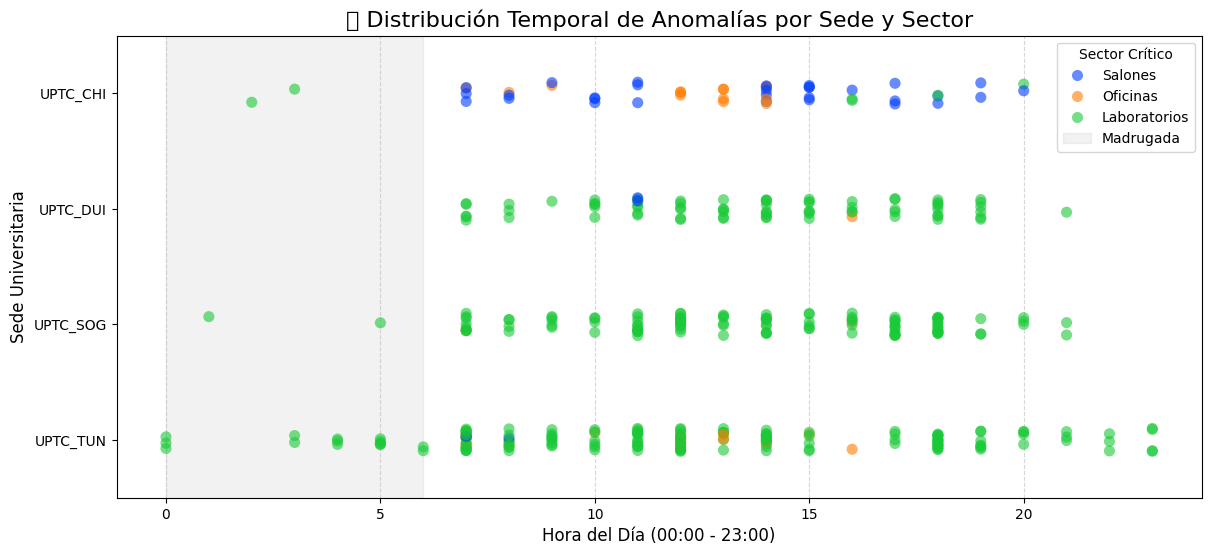

In [128]:
plt.figure(figsize=(14, 6))
sns.stripplot(data=anomalias_final, x='hora', y='sede_id', hue='sector_critico', 
              jitter=True, palette='bright', size=8, alpha=0.6)

plt.title("📍 Distribución Temporal de Anomalías por Sede y Sector", fontsize=16)
plt.axvspan(0, 6, alpha=0.1, color='gray', label='Madrugada') # Sombreado de madrugada
plt.xlabel("Hora del Día (00:00 - 23:00)", fontsize=12)
plt.ylabel("Sede Universitaria", fontsize=12)
plt.legend(title="Sector Crítico", bbox_to_anchor=(1, 1))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [129]:
def generar_insight(df):
    insights = []
    for sede in df['sede_id'].unique():
        data_sede = df[df['sede_id'] == sede]
        # Peor sector
        peor_sector = data_sede['sector_critico'].mode()[0]
        # Peor horario
        peor_hora = data_sede['franja_horaria'].mode()[0]
        # Consumo fantasma
        fantasma = len(data_sede[data_sede['condicion_uso'] == 'Sede Vacía'])
        
        msg = (f"En **{sede}**, el sector de **{peor_sector}** es el más ineficiente, "
               f"especialmente durante la **{peor_hora}**. "
               f"Se detectaron **{fantasma}** eventos de 'Consumo Fantasma' (luces/equipos encendidos con sede vacía).")
        insights.append(msg)
    return insights

print("🤖 REPORTE EJECUTIVO DE LA IA:")
for i in generar_insight(anomalias_final):
    print(i)

🤖 REPORTE EJECUTIVO DE LA IA:
En **UPTC_CHI**, el sector de **Salones** es el más ineficiente, especialmente durante la **Tarde (Laboratorios/Comedor)**. Se detectaron **6** eventos de 'Consumo Fantasma' (luces/equipos encendidos con sede vacía).
En **UPTC_DUI**, el sector de **Laboratorios** es el más ineficiente, especialmente durante la **Tarde (Laboratorios/Comedor)**. Se detectaron **4** eventos de 'Consumo Fantasma' (luces/equipos encendidos con sede vacía).
En **UPTC_SOG**, el sector de **Laboratorios** es el más ineficiente, especialmente durante la **Tarde (Laboratorios/Comedor)**. Se detectaron **20** eventos de 'Consumo Fantasma' (luces/equipos encendidos con sede vacía).
En **UPTC_TUN**, el sector de **Laboratorios** es el más ineficiente, especialmente durante la **Mañana (Clases)**. Se detectaron **25** eventos de 'Consumo Fantasma' (luces/equipos encendidos con sede vacía).
